# Welcome to Bioinformatics Algorithms!

---



# Summary Notes


1.   This course week starts with some basic biological info about DNA structure, replication, replication origin (ori), gene therapy(viral vectors) eg. (frost-resistant tomatoes and pesticide-resistant corn) and **DnaA proteins** which initiates replication by binding to DnaA boxes on the DNA
2.   It mentions the difference between stating a biological problem and a computational  one.  
 -------------
 for example the following  is an acceptable statement for a biological problem but it is not for computational one.
 > In the following problem, we assume that a genome has a single ori and is represented as a DNA string, or a string of nucleotides from the four-letter alphabet {A, C, G, T}.

 > **Finding Origin of Replication Problem:**

> Input: A DNA string Genome.

> Output: The location of ori in Genome.

---------------------------
### *To formulate it as a computional problem we go through the following steps:*
> **Step 1: Replace the Biological Target with a Computational one:**
*   **Original Biological Target:** The "location of `ori`."
*   **Our Hypothesis:** The `ori` is the *only* region in the genome that contains a dense **clump** of a short, repeating k-mer (the DnaA box).
*   **New Computational Target:** Find the starting position of a window of a certain length (`L`) that contains one or more k-mers repeated a certain number of times (`t`).

> **Step 2: Refine the Vague Problem into a Specific Algorithm**

# From

**Vague Problem:** Finding Origin of Replication Problem:
*   **Input:** A DNA string `Genome`.
*   **Output:** The location of `ori` in `Genome`.

---
# TO

**Computational Formulation: Finding the Most Clumped Region**

  To solve this, we can formulate a new, multi-step problem.

  **1. First, we must find the candidate "hidden messages" (the DnaA boxes).**
  
>  **Problem:** Clump Finding Problem.

>  **Input:** `Genome`, and integers `k` (e.g., 9), `L` (e.g., 500), and `t` (e.g., 3).

>  **Output:** A list of all k-mers that form `(L, t)`-clumps. Let's call this `Candidate_k-mers`.

  **2. Then, for each candidate k-mer, we must find *all* its occurrences in the genome.**
> **Problem:** Pattern Matching Problem.

>  **Input:** The entire `Genome` and one k-mer from our `Candidate_k-mers`.

>  **Output:** A list of all starting positions where this candidate k-mer appears.

  **3. Finally, we analyze these positions to find the `ori`.**
> The **"location of ori"** is now computationally defined as: **The small region (or set of regions) in the genome where the starting positions from Step 2 are most densely clustered.**



  

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
## Here, I write the Code Challenges and my own solutions for it

## Challenge 1

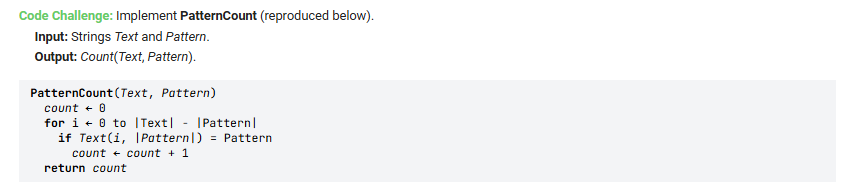

In [6]:
# Defining PatternCount function as required in the pseudocode above
def PatternCount(Text, Pattern):
  count = 0
  for i in range(0, (len(Text) - len(Pattern))):
    if Text[i:i+len(Pattern)] == Pattern:
      count= count + 1
  return count

In [7]:
#@title The dataset used in this challenge
Text = "GAGATCACTGAGATTGTTACTGAGATTTGACTGAGAACTGAGAACTGAGAACTGAGAACTGAGAAAACTGAGATCCCACTGAGACACTGAGATTAAACTGAGAACTGAGAACTGAGAAACTGAGAAGCTTAACTGAGAGCACTGAGATCAAGTCTACTGAGACTAACTGAGATCACACTGAGACGTCACTGAGAGTGACTGAGACACTGAGAACTGAGAAGTAACGCGGACTGAGAGAACTGAGATGACTGAGAACACTGAGAACTGAGATGAAAACACTGAGAACTGAGACACTGAGAGGCAAGTGCGACTGAGAACTGAGATCAGAACCACCGACTGAGAGCCTGACTGAGATACTGAGATACTGAGAACTGAGACCCCACTGAGAGACGGCGATAATTAGAGATTTCCTGATGACTGAGATTACTGAGAACTGAGAACTGAGAGTATATCTTGAGGACTGAGAAATACTGAGACATGGGCACGGTACTGAGAGACTGAGAGTAGAGACTGAGAACTGAGAACTGAGAAAGACTGAGAACTGAGATACTGAGATCAACTGAGAAACTGAGACATGTACTGAGAAACTGAGAACTGAGAGACTGAGAACTGAGAACTGAGACTAAAGACTGAGAAACAACTGAGAACTGAGACTCAATCACTGAGACACTGAGAGAACTGAGAAACTGAGACTGACAGTTACTGAGACACTGAGAGGAACTGAGAGACCAATGGGACTGAGATACTGAGATGACTGAGAACTGAGACGGAGCACTGAGAGGCAACTGAGAATCAACTGAGAACTGAGAGCGATACTGAGACAACTGAGACCGAACTGAGAGACTGAGACTCGCTCCATGACGCCGGTGTACTGAGAACACTGAGAACTGAGAGTACTGAGAAACTGAGATCTACTGAGAACTGAGA"
Pattern = "ACTGAGAAC"

In [8]:
PatternCount(Text, Pattern)

26

## Then, we developed a straightforward algorithm for finding the most frequent k-mers in a string Text .

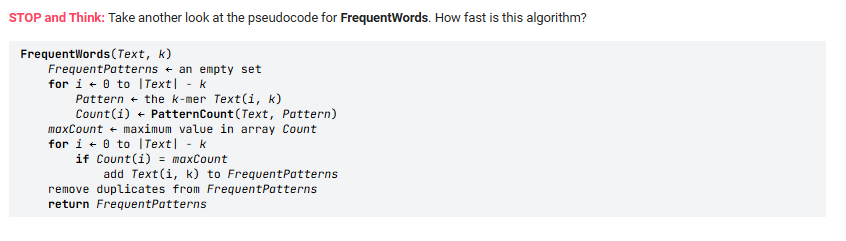

-------------------- > The answer is : This algorithm is extremely slow and inefficient for any realistically sized DNA sequence. Because, FrequentWords must call PatternCount |Text| − k + 1 times (once for each k-mer of Text), so that its overall number of steps is (|Text| − k + 1) · (|Text| − k + 1) · k. To simplify the matter, computer scientists often say that the runtime of FrequentWords has an upper bound of |Text|² · k steps and refer to the complexity of this algorithm as O(|Text|² · k)
> |In practice If your genome Text has 1 million (10⁶) bases, |Text|² is one trillion (10¹²). Even for a powerful computer, performing a trillion operations will take a very, very long time. This algorithm is computationally infeasible for real genomes.|


In [9]:
# Defining the FrequentWords function as stated in the pseudocode
def InefficentFrequentWords(Text, k):
    FrequentPatterns = []
    patterns_set = set()
    counts = []
    for i in range(len(Text)- k+1):
        Pattern = Text[i:i+k]
        counts.append(PatternCount(Text, Pattern))
    max_count = max(counts)
    for i in range(len(Text)- k+1):
        if counts[i] == max_count:
            pattern = Text[i : i + k]
            if pattern not in patterns_set: # Check if pattern is already added
              FrequentPatterns.append(pattern) # Append to the list
              patterns_set.add(pattern) # Add to the set to track uniqueness
    return FrequentPatterns

### Then, We developed a better Frequentwords function of O(n * k) runtime instead of the previous one by 1. forming a frequency table for (Text , k) 2. searching for the patterns with maximum value.  
### for example Text equal to "ACGTTTCACGTTTTACGG" and k equal to 3. You would slide a length-k window Text, and if the current k-mer substring of text does not occur in the table, then you would create a new entry for it. Otherwise, you would add 1 to the entry corresponding to the current k-mer substring of Text. We call this table the frequency table for Text and k.


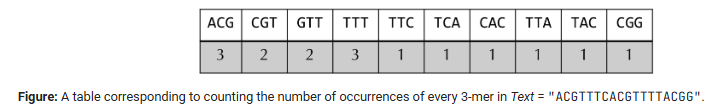

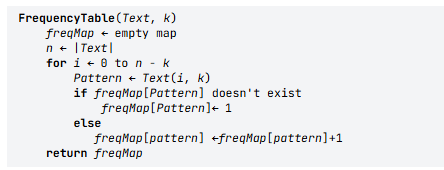

In [10]:
# This functiın returns frequency table as a map of string keys to integer values.
def FrequencyTable(Text, k):
    freqMap ={}
    n = len(Text)
    for i in range(n - k + 1):
        Pattern = Text[i : i + k]
        if Pattern not in freqMap:
            freqMap[Pattern]= 1
        else:
           freqMap[Pattern] = freqMap[Pattern] + 1
    return freqMap

In [11]:
def MaxMap(freqMap):
    maxVal = 0  # it keeps increasing untill the pattern with maxVal comes
    for pattern in freqMap:
        if freqMap[pattern] > maxVal:
            maxVal = freqMap[pattern]
    return maxVal

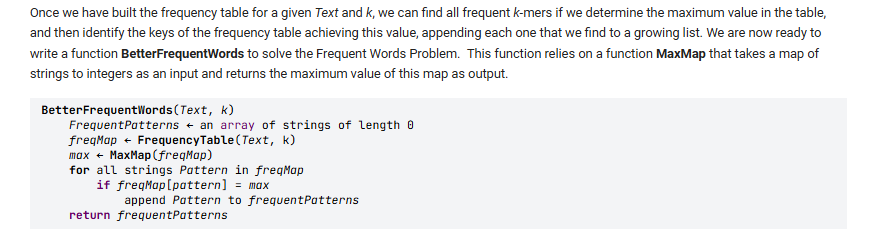

In [12]:
# we used the functions we built previously
def BetterFrequentWords(Text, k):
    FrequentPatterns = []
    freqMap = FrequencyTable(Text, k)
    max_val = MaxMap(freqMap)
    for  Pattern in freqMap:
        if freqMap[Pattern] == max_val:
            FrequentPatterns.append(Pattern)
    return FrequentPatterns

### Let's run the InefficientFrequentwords and the BetterFrequentwords functions to see the difference in runtime USing the dataset given in the challenge

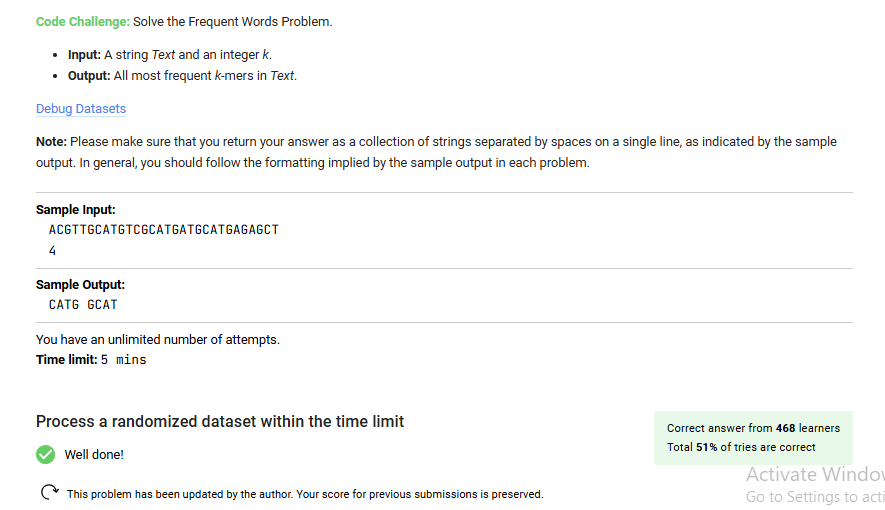

In [13]:
#@title The dataset givien the challenge
Text = 'TGCACCGCTGAGGTCGGTACGGGTCGCCAACAAGACGGGTCGTGCACCGCTGCCAACAAGTGCACCGCTGAGGTCGGTCCAACAAGTGCACCGCTGCAATATCATGACGGGTCGACGGGTCGAGGTCGGTAGGTCGGTCCAACAAGAGGTCGGTCAATATCATGCCAACAAGACGGGTCGTGCACCGCTGAGGTCGGTACGGGTCGAGGTCGGTACGGGTCGACGGGTCGACGGGTCGTGCACCGCTGCCAACAAGCAATATCATGCAATATCATGCAATATCATGCCAACAAGTGCACCGCTGTGCACCGCTGAGGTCGGTTGCACCGCTGCAATATCATGTGCACCGCTGTGCACCGCTGAGGTCGGTACGGGTCGCCAACAAGACGGGTCGACGGGTCGAGGTCGGTTGCACCGCTGCAATATCATGACGGGTCGTGCACCGCTGCAATATCATGCAATATCATGAGGTCGGTAGGTCGGTTGCACCGCTGACGGGTCGTGCACCGCTGCCAACAAGCAATATCATGCCAACAAGCCAACAAGCCAACAAGCCAACAAGAGGTCGGTAGGTCGGTACGGGTCGCAATATCATGAGGTCGGTACGGGTCGTGCACCGCTGTGCACCGCTGACGGGTCGTGCACCGCTGACGGGTCGTGCACCGCTGCCAACAAGTGCACCGCTGTGCACCGCTGAGGTCGGTTGCACCGCTGTGCACCGCTGCCAACAAGAGGTCGGTCCAACAAGAGGTCGGTTGCACCGCTGAGGTCGGTCAATATCATGAGGTCGGTCAATATCATGCCAACAAGCAATATCATGCAATATCATGTGCACCGCTGAGGTCGGTAGGTCGGTACGGGTCGCCAACAAGAGGTCGGTACGGGTCGCAATATCATGCAATATCATGAGGTCGGTTGCACCGCTGCAATATCATGTGCACCGCTGAGGTCGGT'
k = 14

In [14]:
import time
# Here we run the better function and and calculate the runtime
start_time_efficient = time.perf_counter()
Fast_result = BetterFrequentWords(Text, k)
end_time_efficient = time.perf_counter()
duration_efficient = end_time_efficient - start_time_efficient
print(f"the Frequent Words: {Fast_result}")
print(f"Execution time: {duration_efficient:.4f} seconds")
print("-" * 50 + "\n")

the Frequent Words: ['TGCACCGCTGAGGT', 'GCACCGCTGAGGTC', 'CACCGCTGAGGTCG', 'ACCGCTGAGGTCGG', 'CCGCTGAGGTCGGT']
Execution time: 0.0004 seconds
--------------------------------------------------



In [15]:
# and here is the runtime for the Inefficient function
import time
start_time_inefficient = time.perf_counter()
result = InefficentFrequentWords(Text, k)
end_time_inefficient = time.perf_counter()
duration_inefficient = end_time_inefficient - start_time_inefficient
print(f"the Frequent Words: {result}")
print(f"Execution time: {duration_inefficient:.4f} seconds")
print("-" * 50 + "\n")

the Frequent Words: ['TGCACCGCTGAGGT', 'GCACCGCTGAGGTC', 'CACCGCTGAGGTCG', 'ACCGCTGAGGTCGG']
Execution time: 0.1255 seconds
--------------------------------------------------



In [16]:
 # --- Calculate the speed difference ---
speed_difference = duration_inefficient / duration_efficient
print(f"Summary: The efficient algorithm was ~{speed_difference:.1f} times faster!")

Summary: The efficient algorithm was ~316.5 times faster!


### Then, we get into developing a function to get the reverse Complement of a pattern


In [17]:
def reversecomplement(Pattern):
  # Create a dictionary for nucleotide complements
  complement_map = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
  # Use a list comprehension to get the complements and then reverse the list
  # Join the list elements into a string before returning
  return "".join([complement_map[l] for l in Pattern][::-1])

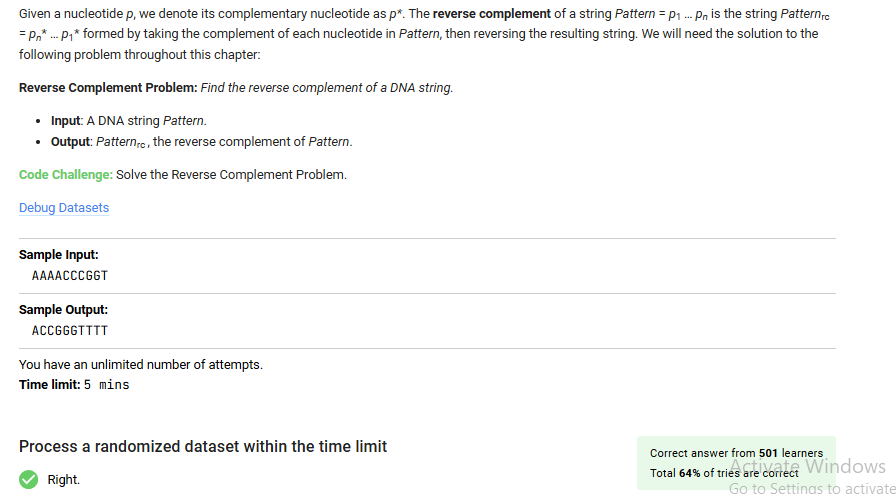

In [18]:
#@title Using the dataset given in the challenge
dataset = 'AAGTAGTTTGACGCATAGTATCTAAGCGTGTACGTACATGCGGATGAAGTCGCATTTCAATGTATATCAACACGGCCGGAAATTCGCTACTTTGAAGTTTCTGAATCTTGTAGGCGAATTTCAGGCGTTGAGATTCCTGGGGTGCCCAGAGCTTCCGACGCTTGGCGTGCGCTCTTGAGTAAGTGGTGTAAACAGACTATGTGGTGAACTCGGTCGCTTTAGAAACGCTTTTATTCCTAAAGCTTATATCACTGAGGTAGGAGGGATAAAGGACACCTGAACCAAAGCTTCTAATCTGATCGTACTGCATTATCCAGTAAGTTGTTAGTTGTGAGCACGTAGCGGAACAGCTTCATAATCGAAGTTATCGAGCATTTATTGACTTAGTCTTTTTATGATGGTATGTTACTAGGATGGAAGTCGCTCCCTTGACAAGGTGTTACAAGCCTTAGCCGTCCCACTCATCGAACTTCGATCAGCTCCCCGCAGGCCAACACACTACGCGCAGTCCGCGTTCGACTACAAGGTAATAAATCCTATTTGATATCGTAACGATGTAAACGTTACATTTCCGTGAACATCTAACTTGGTTAAAGGCTATTTAATCGTAACGATCAGGCTTCACACGACCTCCCGAGTACCTATCTTAACCGTATGGTACTCGACCGTGGTTGGGGCCCGAAAGTTACCCCTTGGATTGCACCGGTCGTAGACAGGCAGAGAGGTGCCGATATGGTAAACACGCCGGGGGCTGGGTTGTAGATTAACATGAAGTATCTATGTTCCAATCTTTCGGGTGTACACTCCACACCAGCCGTGGACTCTCTGACAGACCGCAGGACAATATTCAATAGAGACTTTCGGAATACAAGCCGGGGCTAGAAGTCGAGGAGAGTTCTCTCGACCTCAAGGCCTTATCGCCGCTATGTACAATCGTGGACTGCCGACTGGGCAGAACACCTAAGGTGAGCGAGCTTGTAGTATATTAACATTATGTACTAACTGGATTCATGTACTACATTCTCGCAAGTATTTAGACTAGGCACGCGAGATGAGCTCTGAATTCGCTTTGGGAATTGCCCTATCTCAACAGCTGTTAAGATCTTGAGCGGTTTTTAGCATTCTAATGACATCCTCTAGTATCAGTCTCCTGACGATACCCAGATGATTGCTGCGCTACTTACCAATGGCGAGGGTACGAAAATATGCTTGATGGTCCGGGTCCGTCCTATACTCCGTTAAGCTCGCGGACTTTTGAGTGTATGCTCATGGAGCGGGCCACTTACCCAACAGTGCCAACTAATAGATAGGTTTCGCGGCCAATACTAGATCCCGGACATTTATGTTGGTCAGTGTGATAAAAGCACTCCCTGCCCACGACTAGAATCTAAAACCCGCTGATCAACAGGCGGGCCCTTTAACCGCTCCGACTGGATTATATTAGAATTAGGCGTCCATCTTGTGATCCCCACGCAGCCTTAATAGGGGCACGACGGCTCGTAAGTTAGTAGCAAGCAAAGTGCATACACCGGGGCGTCACGACGCATGACTACATCCTCTTGTCGTGTGTAGGGACCCCTAGCGGAGTACTAGCCGAGGCTTAAGCCATTAGTTCAGTTGAACGTGAGTCGTTTCGACGGGCCGGTATGAAGGACGAGAGCGATCCACGAAGCCTTTCAGACGCATACTCTTGCTATTACCGACGAGAGGCGCGGCCTGGATCAGGCTCGCATATAGTAATTGGAAATAACACTCGTCCTGACGGGAGTCAGGCGATCGGCAATTAGTTCGGTTATAAAACCGTTAATGGTGGCCTATCTACTTAGTAGAGATGTATAAGTTTTGTAGTTCCGCGACCAGGCCACTCGACCCATGTATCTAAAGCCGCTCCCTAGACATCTTTCCGATCCGGCCTGCTTCGGCGCAGGTTTTGCCTGCATCGGCGAATTGGCTATAGGACCTGACTTTGGTGTGGCATAAAGTCCAAGGGGGACAACGTGGACTTTGTGTGGCAAATCACACCAGCTTAAATCTTACTATAGTCCTGCGATCATTTAGGTTATAAATAGAAATCGTCTCACTAAATTCTTCTACTGATATCCGGATTCGCCTCTTAGAATGAGTTTAGCCCGGCAAACGGGTACAAAGAAAATTGATCGAGGGTCATGAGTCGAAGCCAGGTTTTCGTCGGCGATCATTTTCCCTTCTGGTCAAGTGGGATCGACAAGCCAGCTGGCTTTGGGCAGACGTACGTACCGTGGTACTCACACAATAATACTTTGGCCAAGCCGCCATACCCGATGGAGTTTAAGCCTCGTGGTGACCCATGTGCTGTTTCGTGCGGTGGTGTTGATTACTACACCACGGCATGACCTTTCTTTCTCGCTAGATCGACGACGCGTATGCGCGTCCGTCGTACACAAGGACTGCGATCTATGATGAGCTCCTCGGTCGTTCATTCACAGACAAAAAACATTTACCGGCGAAAAATTTTATGATCTGTACGACGAACGCCATTTCTGAGTACGGGGGCCTGGCAGGGTAGTATTGTCTAGTTGAGGCTTACCCTAGGTTATTTGTCAGACTCATAGTACCTCGTAGAGATGCGCCGCTGCCATGTGGGCTGCTCATCTCAGCAGGTGTCAGCTTTCGAAAGGCAGAGGCTGAGCTGCGGGCTCTCTCGCGGACGTATAGAATGGAGCCCAAGCACGGACTCATTACTTCTCAGTCCCGCTCTACCCTTGTTGCAGATTAGATGCGCCATCTGCGGGCAATTCACCGACGTGAGCCAACAGTGCGCGAGGTATACCACTATCTAGACCTGAGATATGATTGGTGGGGGACTGCGCCATCGTTGTACATCTAGCGATGCACGTACACTACCGTCTCGTGGGGCTCTCACTGGCTTACCGGACGGCGCGCCCTCTATCTTCAATGGGCGCCTACTTGGCTATGGATATGCCCAAACAGAAGCCGGAATCAACAGATTGAACTGGGGCGTGGTGGTTATTATAAAATAGCCCTGCACCGCGGTAGTTTTACGAAGAATCGCATATGATCACAGTTGGGGACGAGCTATTGACAAACGAGTTTATTTCAGACGATTGCAACGGTTCGAAAACGCCGGGCCAGAGTCACTATTAATGAATCACATTCTGCGTATTAATGATAAACCACGCTCGTAGGGCAAGGATAAGTACAGTAGGCACTCAGTTATTTATTGAAAAATTTAGACAGCAGTGCCCAGCCGGGTCGGGGAGTCGAATCAATCAACTTTGGGAGTCAACAAGGGAACCCATAATCCCCTGTAAGTGGACTCCCCATGATATGCTACTAAGGACCCGTTACATCGCATTTTAGCGATGCCCATTGTATCATACTCTAACGATACTGTCGCAAAAGAATAGCCATGCGGTATGCTGTTTTTCCGAACATCAGCGTACATCACGGTTCCGTTGTGGATAAGCGAACGTATATTGCACGCTTCATCCTATCTTGCGTAGGCAGAAACCTTGCACTCAAGCCTAACGTTAAACATTCTAGAGGATAACGGTCGGTTAAAATACCACTCAGTATGCGCTGACACATCTGGAATCCGAGTCGACGCGGTAAGATGTAACTATTAATAGGTGGGCAATACTCAACCGTCAGTAAGACTATGTTGGGAAAAACCTTTTGCGAATAACATCACCCGAGATACCCTCTCTTCTCCATGTAGGATCCCTGTGTACGCACCAGAACGGCATCCCGCGCGGCTCTACCCTCAGTGCAGTAATGTAACATCTCCCGTTCTACAAAAGTCGTAGGGTTTGATAGGTGTGAGTGAGGTCCTTAGTAGTTACACACCCCATGTTTAGTACCACACATGGTTAATAGCGCGTGTACGCAAGAAGAGGGTTAGCAAACTCGATTCCCGTTAAGGGTAAGCTCGTGTTTGTCCCGCCGCGTCTGTTCGCGGTAGGCTATGAAATAACTAAAAAGTCTGCACGTTAGGGGGGACGAAGGTTCATCAGGAACTTCATTGAATGTTCGCAACAGCTTCTACCGCGGGTAGAATCGATTGATGAGCCCCACCTAATAAGCTTCGCCGGATTTGCAAATAGAGGCTGCTTGGCGAGATTTGATATCCTAATTACCACGTGGCGAGTGGAACGCAATTGAGTGTAGTAAGCCCTATTAGCTACTCATTTAAACACAGGATCCGAAAGAGACATTTGGTTACCAGGGTGACGCTGCTGGCAAAAGACACAGGCCAGATAAACGCATGCTCGACAAGAAGTTGCCATGGCAGGTAGGTCAGTCCTTTAAATGTACCTAATTTTATTGGCAATGCATTCCTAGTCACTGGGCTCCCTCTCTCGTCTATCGGGCCCTAATGTAGCTAGTGTACGTTCAGGTCGTCAGAGCCGAGACGGGCGCTACAAAATCCTGAAATTAACGAGTAGCAATCTAATGTGAGGGATAACATGGTAGCAGAGGTGTTGAGAACCCGGCGCTAGAAGACTGAGAGTGCACAGCACGGGTTGCGCATATGGCTAAGGCATCGCGCTCGATATGATCCAATCGGTAGACCATGCTATGCCCTATACTCTCTCTCAGATCTTTTTCACCTGCTGTGTGTAACGAGCCACAGCATCGTTCAAGCGTTTCCAGTCAGCATGGGTCGAGTCGCTATCTCTAGTGGGAATTAATGTCCCAAAGAATTTCGGGCAGTTGGCCAGTGCAGGTGCACTTGTAAGTGCCACTCTGTGGTCCGAAAGGCCCAGCAGCTGCGACGCGAGTGCCCGATCTCCTAAACGACTAAAGGTTCAGAATGTCATCCCTGTAATTACCTTCATTCTCCTTACTCTCCCTAGGTAGGTGGACCAAGCGACCTAACGAAGAACTTGGTTAGCAAAGTAACTGGGTGCTGAATTCTCACAATTGGCCAATAAATAGGCCCAATATCAAACGTCTCGTAATTTCTGCCAGTGATCAGAAAAGCGCTTCACGACGCGTCAGGGTCTCATCCCTTCCGAAACCATCGAAATCAACGATATCAAGATTTAAGAGATTGCGCAGTCGTGCACGCGCTCGCGGAGGAAAACTCGATGGCCCGGACTACGCTCATTTGTGCCGACGTAAAGCTGTAGTGTGAGAATGCGCTTTACCCTTAGATAGAGATTTCCTGTAATGCGTGCGCGTCTTATCTACCCGCGGTCTTAATACACCCTCCGCAAATGGAGCGACGGATTGACTCTCCTCATGGAGTTTCACAGAATACAAGCAGAATTGAGGGGATCGCAGAACACGGGACGTAAGTCTAGCAGACCTGCCAGCTCATAGGCTAGTCCCTCTACTACAGTACACGTAGATACTCCAACAGACCTTGAGTGACGAGCTAGGGCATACTACTAAGATAGGTCGTTCCCCCATATCTAACAAGAACCGGGCTGATGCACTTACGTGGACTTCGCAGTTGACACGCTCACATCTTCTACGTTAAGGGCGGGAGCCCCGATCGATTTGGCGCGAGTCATACTAATGGGCATCACTGTGAGCGGAATGCGGACCGATGATAGACGATCCAACTAGGCAGCTATCACTCGGGGCCCGGTCACCCAGCAGAGGCCGCATGTTGGCACGGTTGGATGCTGGCGCTCGTATCGGCTCGATCGTACTAAGGGGGCTGGGTGGCGTGGTCCGAGGATACCGTCGCTGGGTAAACGTGGCCGCCTTACGACTTAGGGTAACACTGTATGACGGACGCATTGAATTTTGATCCCACCTCACACATAGATTCTGAAGGACAGGAAAGGCGCACCGTGGTCTGAGACATTTTGAGCGCAATTGCCCACACTACGTTAAATAGCTCATAAGTAAACCTCTGTCCCGCAAATACCCGACACCCATCCTCATTCGCCGGATACTTACACACGGGACTCGTGCGGCAGATGGAATTACGAGGTTACTTAATGCAACACATCAGCTTGATATGATGGGTAATAACAGACTACCCTAAAGAAGCCTACGATAAATGAATGCTGTTCTGGGTTACGACTGCGATCTTATTACGCAAGCGTTGACGGACTTGGATCTGTAACACCTATATGTCCTGAGACTCGAGCGTTCAGACGCACTTCTCCGTTGTGAAGTAAACGCTTTTGTCATAACGTCGACAGATGTGTTCATGTAATGGGCTGCTGCATCTCTAGAAATGCATTGTAAAGGACAGTACAAACGGTTGTCTCAGACCCTAACCGATCGCGGAAGCAGCATGCGTGCGCCGGTTGGTCCAGAAGAGTGGACCTCCATGTTCTCGGTTTTGTGATTTGCACACCAGGTAAGAGCGAATTTTAGCCGGAACGGGACCATGTTCGGATGGTTAATCGATGCATCCCGGCTGGTTGACCACTTGTGCTGCAGTCCATCTTACATCCGTAGCACTAGGGAGCGGCTCAACGGGAAAAAATCGTCATAAAACAGCCCATTCCACTTACCGGTCCTTAGCCTTTACTACTGGGCATTCATGCATCAAATAGCTAAAACGCAACGGGCGCAGGCAGGTACACTTCATTACTTTAATTGCCGTCGTAGGTTGGCATTTCGTATGGCGCAGGGGCGGAGGTCAAGGATCACAAGGGCTCGCCGCCCAGTTGACGGGGGTCAGTAATGAGTAGATCCTTTTGGGAAGACACGCTCGAGCCCAGCGGAGTCTCGCCACGTCCAGTTAAGTTCCGGTATGACTGCTTGGTCGCTCGGAGTAAGAGCCAAAGGCTCTTTAATTTCTCGGCAAAGATCGGAAACGGTAAAGGCTAGTCGGCTGACGTACGCAGGTATAGGAGGCGATCTCTTTTTAATTGCCTGCCTTACTCCCACAGTTTCGTCTCCCTGCGTTCTTTCAACGGGCCAGGTTGTTGGCTCTATCAGTAGCCACAACCAAATCTGCCATAGTTACATGCCATGACTCTCGCACTATAAAGTCGGGTAATACGAGCTGTGGCGTCCGGAACCCACTTTCGATCACATCTTTAGGCTGACGCAGACTTACCTCAGCCCTAATAGGCCTATGACGCCTACCACTTCCGTCGTCTTCCTTTAGACTTACAATGACGGTGCACCAAGAGGAGTCGTGGTAACACCTTGTGCCGCAGCGTCAGTAGAACGCTAGCATCCGGTTCATACGCCATACCCAAGTGCGGCTTCGGTAGTTAGGAATGGCTTGACCCTAAGGTTACGACCGGTGCTCCGATTTGGCGACGCTTGAACGACGTGATCACAATTTAATTCTGGCTCATCTTGACACACACGACCCAAGGTCTAATTTGGCCGTTCCAGGTTTTACTTTACTGGTTATTGGCTGTATGCCCTACCTTCGCTTCAGCGCGATTAGTACAACTGACTCTATGCCGTGTTCAGGTTTGGACGGTCTGACCGTCAGGCGAATCGCACCGTGAGGGTGTGGCATATAGTTCTACCGACGAAATAGAAGTCCTAAGTTGGGACGATATGCTTGAAGGGTCACTTGAGGTCGCGGTGACTAGGATCGGCGGATTTCCTCACGTTATTACATACGTGAACCTGCGTACGATTTAGTGGAGTGTCGGTGATATAAGACATACAGTATTGCATGCAGTGCTACGAGGGTGCAGTTTTAAAGAACGGTGGAGTTCACGTCTCCGGTGCTTCAATACGGATGCCACACAACCTCCCGGTCAGTATCAGACCGCGGGCCAACGAGACGTTGGGGCGAGGTTCCACCAGTCACCGGAGATGCTATGGGCAGGAACCACGTAATAGAAGCTAGCCCGTTTAGTTTCAAGCCAGCATCGCACACATCCTCTTTACCCACCCGGTCTTTTGGAAGGCATGAGCACAGTCTACGGGGCGTCTCACTATTATAGGCTAGCGCTAGCTCTCCCTCGCGTTCTGCTTACCTTGAGTCCGCATTCGCGACATGCGCATCGGTGGCTATGATGGTTCTGGCCTAATGATGTCGCTGGACAGCCTCGACTGGCGAGGTGCAATCTCTCCCCACTCTGGGGGAAGTACGCCTCACAGTTAGCATTGGATGGTGTTCCTTTCGTACCACGTGGTTTCGC'

In [19]:
#Applying the function to the dataset
reversecomplement(dataset)

'GCGAAACCACGTGGTACGAAAGGAACACCATCCAATGCTAACTGTGAGGCGTACTTCCCCCAGAGTGGGGAGAGATTGCACCTCGCCAGTCGAGGCTGTCCAGCGACATCATTAGGCCAGAACCATCATAGCCACCGATGCGCATGTCGCGAATGCGGACTCAAGGTAAGCAGAACGCGAGGGAGAGCTAGCGCTAGCCTATAATAGTGAGACGCCCCGTAGACTGTGCTCATGCCTTCCAAAAGACCGGGTGGGTAAAGAGGATGTGTGCGATGCTGGCTTGAAACTAAACGGGCTAGCTTCTATTACGTGGTTCCTGCCCATAGCATCTCCGGTGACTGGTGGAACCTCGCCCCAACGTCTCGTTGGCCCGCGGTCTGATACTGACCGGGAGGTTGTGTGGCATCCGTATTGAAGCACCGGAGACGTGAACTCCACCGTTCTTTAAAACTGCACCCTCGTAGCACTGCATGCAATACTGTATGTCTTATATCACCGACACTCCACTAAATCGTACGCAGGTTCACGTATGTAATAACGTGAGGAAATCCGCCGATCCTAGTCACCGCGACCTCAAGTGACCCTTCAAGCATATCGTCCCAACTTAGGACTTCTATTTCGTCGGTAGAACTATATGCCACACCCTCACGGTGCGATTCGCCTGACGGTCAGACCGTCCAAACCTGAACACGGCATAGAGTCAGTTGTACTAATCGCGCTGAAGCGAAGGTAGGGCATACAGCCAATAACCAGTAAAGTAAAACCTGGAACGGCCAAATTAGACCTTGGGTCGTGTGTGTCAAGATGAGCCAGAATTAAATTGTGATCACGTCGTTCAAGCGTCGCCAAATCGGAGCACCGGTCGTAACCTTAGGGTCAAGCCATTCCTAACTACCGAAGCCGCACTTGGGTATGGCGTATGAACCGGATGCTAGCGTTCTACTGACGCTGCGGCACAAGGTGTTACCACGACTCCTCTTGGTGCACCGTCATTGTAAG

# Then we get into looking for all occurrences of a pattern in a string using the pattern and its reverse complement

# The challenge here asks for specifying all starting positions where Pattern appears as a substring of Genome.
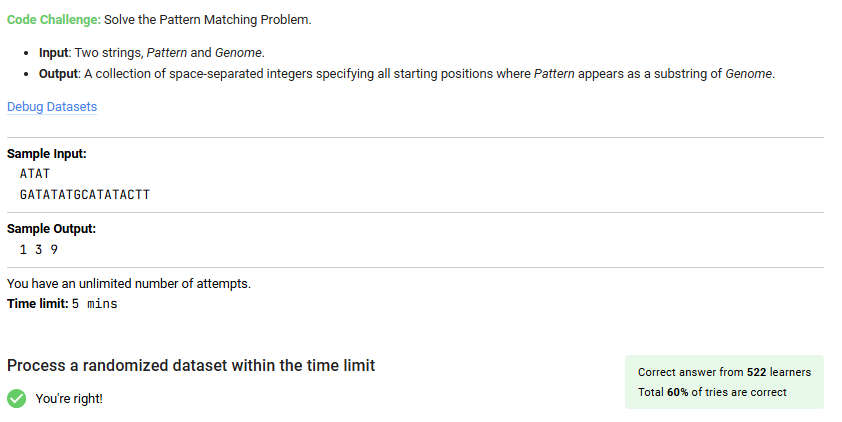


In [20]:
# It looks for all the indecies where the Pattern starts
def PatternPositions(Text, Pattern):
  Indecies = []
  for i in range(0, (len(Text) - len(Pattern)+1)):
    if Text[i:i+len(Pattern)] == Pattern:
     Indecies.append(i)
  return Indecies

In [21]:
#@title Using the dataset given in the challenge
Text = 'GCGGCGATGTGACCGATGTGACGATGTGTAGCGATGTGCCAGATCGATGTGCGATGTGCCGATGTGTCTGCGATGTGCGATGTGCAAAGGATTAGTCGATGTGTTTCGATGTGCCCGATGTGATCGATGTGCGATGTGCCGATGTGCGATGTGAAGGCCTGCGATGTGCGATGTGCGATGTGCGATGTGGCAACGATGTGCGATGTGCCCGATGTGCGATGTGCGATGTGCGATGTGTCTCGATGTGCGATGTGCGATGTGGTCGATGTGAATCCGATGTGGCTCCGTGCGATGTGACTTCGGCGATGTGGGCCCGATGTGCGATGTGGAATAGCGATGTGTCGATGTGCGCGATGTGTCGATGTGGCTCGCTGGCCGATGTGTACGATGTGCGATGTGCGATGTGGTCGATGTGCGATGTGTCGATGTGCGATGTGCGATGTGCGATGTGACGATGTGCGATGTGAGTCCGATGTGTCGATGTGTCGATGTGCGTATGTTCGATGTGGGCGATGTGCGATGTGCGATGTGACGATGTGCGATGTGCCATTTCGATGTGAGCGTCGATGTGTGGCCGATGTGCGATGTGCCGATGTGATCGATGTGCCGATGTGGGTACGATGTGCGATGTGTCGGACAACCGATGTGCGATGTGAACCGATGTGCGATTGCCTACGATGTGGAAACGATGTGTCCCGATGTGCCGATGTGCGATGTGTATATTGAACCTACGATGTGCGATGTGGTGGCGATGTGGGGAGCGATGTGCAGTATTTACGATGTGTCGATGTGCGATGTGTCGATGTGACGATGTGCGATGTGGCGATGTGTAATTGCCCTCGATGTGGGCGATGTGCGATGTGCTGCCAGACTATACTCGATGTGGCGATGTGCGATGTGCGATGTGCCTCGATGTGCGATGTGCCACGCTACGGTCGATGTGCGATGTGAGTCGATGTGCGATGTGAACTCACGCGATGTGCCGATGTGGTCACGATGTGCGATGTGTCGATGTGCGATGTGTCGATGTGACGATGTGTACGATGTGCGATGTGTCCTTTTTCAATTATCGATGTGCGATGTGCATTCTCGATGTGTGTCGATGTGATGCGATGTGAGCGATGTGCGATGTGCGATGTGGAAAGCACGATGTGTCGATGTGCTGAAATAACGATGTGTCATCCCACGATGTGCGATGTGTAGCGATGTGGGCGCTCGATGTGGGAAAGCGATGTGCCCGCACACGCGATGTGCGATGTGGCGATGTGCGATGTGTCACCGATGTGTGCGCGTCGATGTGCGACGCGATGTGACGATGTGTTTCGATGTGCGATGGATCTTAGCACGATGTGTCGATGTGTTCCCGATGTGTCGATGTGCTCCGATGTGCCGATGTGCGATCCTAAAGTCGATGTGGCTCGATGTGGCCCCCGCGATGTGGGATCGCGATGTGCGATGTGAGGGGGCGATGTGTCCGATGTGCGATGTGACCCGATGTGGTAAGAATCTCGCGATGTGACGATGTGCGCAGCCGATGTGGTCTTACACGATGTGCGCGATGTGCACGATGTGCGATGTGCCCTTAGGGTCGATGTGCGGGCATACCGCGATGTGCGACGATGTGCGATGTGCGATGTGAGCGATCGATGTGCGATGTGTTCGATGTGCGATGTGCCGATGTGCGCCGATGTGCGATGTGCTCGATGTGCGCGATGTGAATCGATGTGCAACGATGTGCGATGTGGATCGATGTGCGATGTGTTTCGATGTGTCTCGATGTGGCGGCCGATGTGCATCGATGTGGTAGTGGGCGATGTGCGATGTGCTAGCGATGTGCGACCTAAACACCGATGTGTGCGATGTGACGATGTGCGATGTGCGATGTGCGATGTGGCGATGTGAGCGATGTGCGATGTGGCGATGTGTCCGATGTGACGGCCGTACTCCAGGAGAACGATGTGATCGATGTGATGTCGATGTGCAACGATGTGAAGGAGGAAATCCGATGTGTGCGATGTGCGATGTGCGATGTGACGATGTGTCGATGTGCGATGTGCCGATGTGGGCCGTCGATGTGCACCACGATGTGCCTCGATGTGCGATGTGCGATGTGAACACGATGTGCGATGTGGACGCTCACGATGTGGCGTCGATGTGCCGATGTGCCGATGTGCGATGTGGGTCAGTCCGATGTGCGATGTGAACCGATGTGAACGATGTGCCTGGGGGCGATGTGAACGATGTGTGCCGATGTGTTTTTACGATGTGACGATGTGCGATGTGTCGATGTGGCCACGATGTGCTCTAACGATGTGGCGATGTGTCGATGTGCGATGTGCGATGTGCTCACCTTACCCCGTTAGGAACCGATGTGAACGATGTGCGATGTGCGATGTGTAACGATGTGCCACGATGTGCGATGTGATCTTCGATGTGAACGATGTGGCGATGTGTGTCGATGTGCCGATGTGCCGATGTGTGGCGATGTGAGCGATGTGCACGATGTGACGATGTGCCGATGTGCGATGTGCGACGATGTGACAAGGTCGATGTGCGATGTGAACGATGTGCGATGTGGTTACGATGTGCTCCGATGTGTCGATGTGATCGATGTGGGGCGATGTGCCGATGTGCGATGTGAAGCGATGTGGGTGCACGATGTGGGCGATGTGCGATGTGGGTACTAGGTATAGCGATGTGGCGATGTGATTGGGACGATGTGGGTCGATGTGCATCTTCTCCGATGTGGTATTCACTCGATGTGTTGGGCGCCCGATGTGGTCGATGTGCGATGTGCCCAGGGCCTCCGATGTGACGATGTGCGATGTGCGATGTGGTCTACGACGATGTGCGATGTGGCAGCCGATGTGGCCGTCGATGTGATACGATGTGCGATGTGAGAGTCGGGCGATGTGCGATGTGGTAGGTCGATGTGTCGATGTGGTCCGATGTGCCAAGCGCGATGTGCCTGCAATCCGATGTGTAACGATGTGGGCCACCGATGTGCGATGTGTCCGATGTGATCGATGTGCGATGTGCACTTTGCGATGTGCGATGTGCGACCGATGTGCACGATGTGCCGTCCGATGTGCTCTCTGGCGATGTGCGATGTGGCGATGTGCCGATGTGGCCGATGTGCGATGTGCTTGCGATGTGTTAGGCGATGTGCCCTACGATGTGCGATGTGCGATGTGGCGTAATCCCTGAGTCCTGACGATGTGCGATGTGCCGATGTGCGATGTGTGCGATGTGCTTGCGATGTGCGATGTGCGATGTGCGATGTGAATCCAGTAACGATGTGACTCGCGATGTGGGTCGATGTGCGATGTGCGATGTGCGATGTGCCTCTTCTTGCGAGCCTCGATGTGGTCGATGTGTGGCCTCACGATGTGCGATGTGTCGATGTGTATCGATGTGCGATGTGACGATGTGCAGGTCACTTTGCGATGTGCGATGTGCGTATCGATGTGCGATGTGTCGATGTGCCCGATGTGCCGATGTGAGGGGCGATGTGCCCGATGTGTTCCGTACCGATGTGAGGCCGATGTGCCTTCGATGTGGTCGATGTGTCTAGGCGATGTGGCGATGTGCAGTGCGATGTGACGATGTGCGATGTGCGATGTGGGCGATGTGTCGATGTGCCGATGTGACCCGATGTGAACGATGTGCGTGCCCGTACGATGTGTCGATGTGCGATGTGCTCGATGTGGACGATGTGACGATGTGCTGGCAACGATGTGCGATGTGCATCATACGATGTGCGATGTGAAGCGATGTGGCCGCGATGTGCGATGTGCGATGTGCCACGCACCGATGTGCACGATGTGTCACGATGTGCGATGTGGCGCGATGTGTGTCCGATGTGGCGGCGATGTGACGATGTGCGATGTGGAACCGACGATGTGACTCAAGCGATGTGGCCGATGTGATCACGATGTGAGGCCGATGTGATCTCGATGTGCGATGTGTGGCGATGTGCCGATGTGGTCCCGATGTGACATACGATGTGCGATGTGGCGTGTCTACCGATGTGCGATGTGGCGATGTGCGATGTGGGGTCCCGATGTGCACACGATGTGTCGATGTGACGATAGGTCGATGTGACGATGTGAGCGATGTGCTTCTGACCGATGTGCGATGTGCGCGATGTGCGTGAGACGATGTGCCCTCGATGTGTCGATGTGCCGATGTGAGGACGATGTGAACACGATGTGCGCACCGGAACGATGTGGCGATGTGATAACGATGTGGCGATGTGAATTCCTAACCGATGTGTTTAGCGATGTGGGCGATGTGGCGATGTGCGATGTGCGATTTAGCCGATGTGTTGCGATGTGCGATGTGACGACCGATGTGTTCGATGTGGTACTCCGTACGATGTGATCGATGTGAGGATAAGAGCGATGTGAACGTCCGATGTGCGTTCGATGTGAGCGATGTGACGATGTGGCTACCGATGTGACGATGTGCTTCGATGTGGCCGATGTGGCGATGTGACGATGTGTACGATGTGGTAACTTACCGATGTGCGATGTGTACGATGTGCGATGTGCGATGTGCAGCGTTTCTACGATGTGCGATGTGCTGGCGATGTGCGATGTGACGATGTGACGATGTGGCGATGTGGATCTGCGATGTGCGATGTGGACGATGTGTAACCGATGTGGCGATGTGCGATGTGTAATCTCGATGTGACTCGATGTGCCGCGATGTGTCGATGTGCGATGTGTTCGATGTGCGATGTGACCGCGATGTGTGCGATGTGACCGCGATGTGCGATGTGCTATCTCGATGTGGCGATGTGTCGATGTGCGATGTGCGCCGATGTGTCGCGATGTGCGATGTGGTGATCGATGTGAGCTAAACCGATGTGAGCGAACACGATGTGTGGTCTAGCTCGATGTGTATTAGGGCAATCGATGTGGCGATGTGCGGCGATGTGCGATGTGCGATGTGTCCGATGTGGCGATGTGCGATGTGCGATGTGGCTTCGATGTGCCGATGTGCCTCCGATGTGCGATGTGAGCCCGGACGATGTGCCCGATGTGACCTTCGCGATGTGCGGGCCGATGTGCGATGTGTCGTCCGATGTGAGACGATGTGTCGATGTGCGACGATGTGCGATGTGGCGATGTGCGATGTGGCGATGTGCGATGTGGCGATGTGGTCAGCGATGTGCGATGTGCGATGTGTCGATGTGGGCTTACGATGTGGAACGATGTGCGATGTGCGATGTGCGATGTGGGGGCAGCCGATGTGCCCGATGTGGCGATGTGCGATGTGACGATGTGGCCACGATGTGTCCGCGATGTGACCTTGAACCCCGATGTGGAGCTGCGCCCGCGATGTGGACGATGTGTCGATGTGACGATGTGCGATGTGCCGATGTGTCGATGTGAGCGATGTGCGATGTGACTGGTAAAGCCGGCCGATGTGGCTGACGATGTGAGTCTTCGATGTGTCGCGATGTGCGATGTGTTTCTAGATCCTCTCGATGTGACGATGTGGTGCGCGATGTGCGTCGATGTGCGAGAGGCCGATGTGCTCGATGTGGCGATGTGCCGATGTGTTCGATGTGCAGTATCGATGTGACGATGTGTCGATGTGCGATGTGAACGATGTGCGATGTGGCGCGATGTGCGCGATGTGGGGCCGATGTGCGCTTAGTGCATGCGATGTGGCAAGCCCCGATGTGCCTAGCGATGTGCGATGTGCGATGTGGGGTATATATGTCGATGTGCTGTCGATGTGTCTATCGATGTGGGATCAATTGCAGCCGATGTGACGATGTGGTCGATGTGTAGCTCTCGATGTGTCTACGATGTGCGATGTGTACGATGTGCGATGTGCTTGACGATGTGATGGTCTTATTCGATGTGAGCCGATGTGCCCCGATGTGGGGGCGATGTGCGATGTGCCGATGTGCCGCGATGTGCCGATGTGCGATGTGCGATGTGGACTATGCGATGTGTCGATGTGCACGATGTGAAACGATGTGCGATGTGGCGATGTGCGATGTGCGATGTGTCGATGTGGGGCCCGATGTGACGATGTGCCTTTTAGCCGATGTGGCGCATGCGATGTGCGTACGATGTGATTTGAGTTCGATGTGCGATGTGACGGCGCACGATGTGCGTTGGGCGATGTGCGATGTGTGTAACCGATGTGTCGATGTGCCGTCGATGTGGACTTCCCCACGATGTGCAGAGTTCGATGTGGTCTATACGATGTGGGGCGATGTGACGATGTGACGATGTGTTCGATGTGCCCCGATGTGTGCGCACTCGATGTGCGATGTGCCTTGTTCGATGTGTTGTGACGATGTGTCACCGATGTGCGATGTGGGGACTTTCGCGATGTGCGATGTGTCGATGTGTGGTAGCGATGTGGTCGATGTGCTGCGATGTGCGATGTGCCCGATGTGCGACTCCTCGATGTGCGATGTGCGATGTGCGCGATGTGCAAGTCGATGTGCGATGTGCGATGTGGTCACGATGTGCGATGTGATTGACACGGGGTCGATGTGGCGGGTCACGATGTGAGCGATGTGCGATGTGTTGCGATGTGCGATGTGTCGATGTGCACGATGTGTACGATGTGTGCGATGTGACCGATGTGTCAGTATACTCGATGTGAAACTACGTCACACGATGTGGCTTGCCGATGTGCTCTCGATGTGCGATGTGAGAGGGGACGGCTAGTGCGATGTGCGATGTGGCCGATGTGGCGCCGATGTGGTCTGCAAGAGCCGATGTGTCCTTCACGATGTGTGCGTCCGATGTGCGATGTGCGATGTGCGATGTGAAGACGATGTGCCGATGTGTGGACCGCAGTCGATGTGCGATGTGGATCGATGTGTCCGATGTGACGCACGATGTGGCGCTCCGATGTGCGATGTGGCGATGTGAGTCGATGTGCCGATGTGGACGATGTGGCCGATGTGCGATGTGCCGATGTGCGATGTGTAACGATGTGCGATGTGCGATGTGTTATCGATGTGTCGATGTGGCGATGTGTCTTGCCGATGTGACGATGTGGCGATGTGGAGTTCCCACGATGTGCGATGTGAAGCTCGATGTGCGCCCGATGTGTGTATCGGCCGATGTGCGATGTGAACGATGTGACGATGTGCCGATGTGTTCGATGTGTCGATGTGTCAAGCGATGTGCGATGTGCACCGATGTGACGATGTGTTCGACTTTCACGATGTGCGATGTGTCGATGTGACGATGTGCGATGTGATCGATGTGCGATGTGCGATGTGCCGATGTGCACGGGCCGATGTGTATTCAAATCGATGTGCGATGTGTCTCGATGTGGTCCGATGTGCGATGTGGACGATGTGACGATGTGCGCGATGTGAACTTACGATGTGCGATGTGAAACGATGTGCGATGTGAACAACGATGTGGAACGATGTGGCGATGTGTATGTACCCGATGTGAGCGATGTGTGGACGATGTGCGATGTGAGCGATGTGCGATGTGTTCGATGTGAACGATGTGCGATGTGCTCGATGTGCGATGTGGCGATGTGCGATGTGCTGATTCTCTGACCGATGTGACGATGTGCGATGTGCTACGATGTGCGTCGATGTGCCGATGTGCGATGTGACAAACATTACCCGATGTGAAACGATGTGTCGATGTGTGCGATGTGGACGATGTGCGATGTGCCGATGTGAAGCGATGTGCGATGTGGCGATGTGATTCGATGTGTTCTGCGGCGATGTGAGCCGATGTGTCGATGTGTAGCGATGTGAGCGATGTGATAGCTCGATGTGTCCGATGTGCGATGTGCGATGTGGCCACGCCGATGTGAGTCGGGCGATGTGGCTCGATGTGATTCGATGTGTAACCGATGTGATCGATGTGCGATGTGCGATGTGACGATGTGTCGATGTGTCTCGATGTGGCGATGTGCGATGTGACACGATGTGCGATGTGCGATGTGGCGATGTGGCCGATGTGCGATGTGCCCGATGTGGTCTGCGATGTGAACCGATGTGCGATGTGCGATGTGTTACGATGTGGCGATGTGGATCTCCGATGTGACGATGTGACGATGTGGGGCCGATGTGCGATGTGCGATGTGCGATGTGACGATGTGGCCGCTATCGATGTGGCTAGCGATGTGTGCGATGTGCGATGTGGGACAACCGAGTGCGATGTGCGATGTGCGATGTGCGATGTGTTTGGACGATGTGCGATGTGGCGATGTGTATTTTTCGATGTGGCGATGTGTTAACGATGTGCGATGTGTACTTCGATGTGCGATGTGATTTCCGATGTGCGATGTGCGATGTGCGATGTGCGATGTGTCGATGTGATCGTCCGATGTGGCGATGTGTCACGATGTGATAACGATGTGCGATGTGCTTCGATGTGTCGATGTGGCTCGATGTGTTACGATGTGTCGCGATGTGTACCATACGATGTGGATGGACCGATGTGCGATGTGTAATCTCGATGTGACGATGTGCTATTGACGATGTGCGATGTGAACGATGTGAACGATGTGCGATGTGCGATGTGTGGCGAGCTTCGATGTGTTACCCCGTCTCTCGATGTGCCGATGTGACGATGTGCCGATGTGGCGATGTGGGCGATGTGTAACCGATGTGGAAATACGATGTGCGATGTGGGCGATGTGAGACCTGTCGATGTGCGATGTGGCGATGTGGGCGATGTGGTAGCCGATGTGATCGAATTTGATCGATGTGGCATAGTTCCGATGTGCTACGATGTGCCGATGTGCGATGTGAGCGATGTGTTCGATGTGATTGCCCGATGTGAACGACCGATGTGCCGATGTGGGATATCGATGTGGGCGATGTGTCCGATGTGTCACTTCGATGTGATCATGCGGCGATGTGCGATGTGAGTCCGATGTGCGTGCCGATGTGGCGATGTGTTTGCGATGTGCACTTTGCGATGTGCAACGATGTGTGACCTCGATGTGCGATGTGTCCGATGTGTCGATGTGTGCGATGTGCCGATGTGTCGATGTG'
Pattern = 'CGATGTGCG'

In [22]:
indecies_list = PatternPositions(Text, Pattern)
indecies_list.sort() # Sort the list in ascending order
indecies_string = " ".join(map(str, indecies_list)) #To get pastable text to submit for the challenge
indecies_string

'44 70 124 139 161 168 175 193 209 216 223 240 247 314 342 385 392 408 423 430 437 452 486 510 517 532 575 618 641 658 704 731 785 808 849 886 893 910 936 953 994 1009 1041 1070 1119 1126 1186 1246 1261 1293 1323 1390 1446 1475 1519 1547 1565 1589 1607 1617 1624 1644 1660 1675 1685 1701 1730 1747 1811 1829 1865 1872 1879 1903 2012 2019 2042 2092 2099 2117 2166 2188 2269 2324 2331 2376 2383 2410 2516 2523 2547 2563 2626 2665 2782 2815 2822 2844 2885 2908 2999 3024 3045 3052 3099 3131 3173 3180 3214 3229 3256 3263 3270 3316 3323 3330 3385 3410 3444 3451 3463 3603 3610 3661 3686 3733 3754 3782 3789 3830 3877 3954 4002 4026 4041 4128 4135 4144 4207 4297 4304 4330 4414 4522 4538 4545 4570 4588 4632 4667 4715 4731 4769 4805 4812 4832 4925 4935 4942 4966 4973 5010 5055 5067 5104 5114 5129 5144 5171 5178 5216 5223 5230 5269 5368 5400 5464 5512 5522 5600 5616 5633 5653 5700 5707 5819 5835 5903 5936 5943 5991 6006 6013 6078 6105 6127 6141 6285 6330 6354 6401 6417 6432 6439 6446 6467 6474 6492 65

## we  get an Exercise to Return a space-separated list of starting positions (in increasing order) where CTTGATCAT appears as a substring in the Vibrio cholerae genome.

In [23]:
#@title The dataset of the Vibrio cholerae genome.
from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
    # Read the uploaded file
    Text = io.StringIO(uploaded[fn].decode('utf-8')).read()
    print(f'File "{fn}" uploaded and read into Text variable.')

Pattern = 'CTTGATCAT'

Saving Vibrio_cholerae (2).txt to Vibrio_cholerae (2) (1).txt
File "Vibrio_cholerae (2) (1).txt" uploaded and read into Text variable.


In [24]:
# the positions of CTTGATCAT pattern in increasing order assending order is default
sorted(PatternPositions(Text, Pattern))

[60039,
 98409,
 129189,
 152283,
 152354,
 152411,
 163207,
 197028,
 200160,
 357976,
 376771,
 392723,
 532935,
 600085,
 622755,
 1065555]

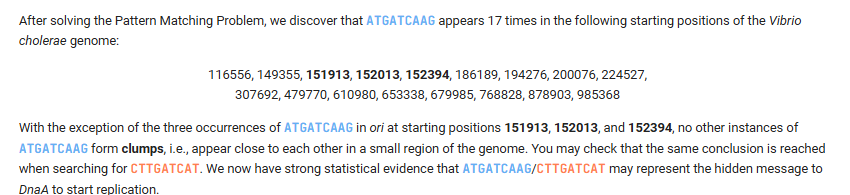


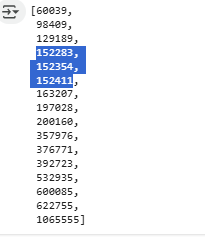

# Clump Finder algorithm
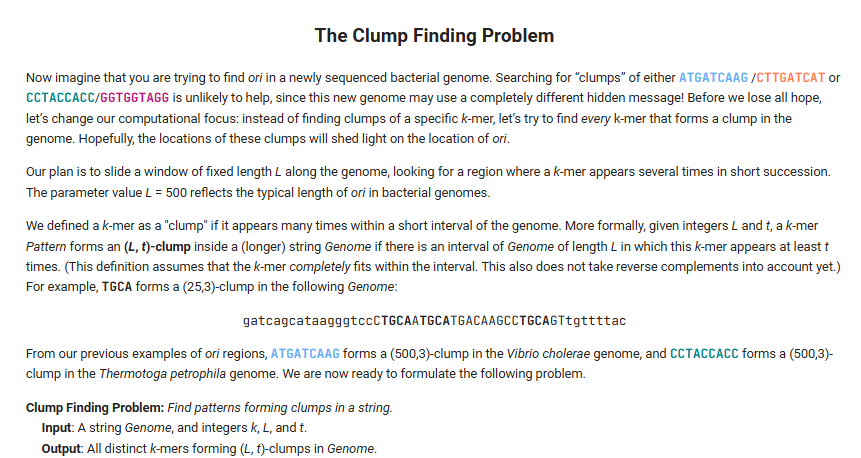

In [30]:
def FindClumpsFaster(Text, k, L, t):
    """
    A much faster implementation to find k-mer clumps.
    """
    result_patterns = set()
    n = len(Text)
    if n < L:
        return []

    # 1. Initialize: Compute frequency map for the first window
    first_window = Text[0:L]
    freqMap = FrequencyTable(first_window, k)

    # Add any patterns from the first window that already form a clump
    for pattern, count in freqMap.items():
        if count >= t:
            result_patterns.add(pattern)

    # 2. Slide and Update: Iterate through the rest of the text
    for i in range(1, n - L + 1):
        # Get the pattern that is leaving the window on the left
        old_pattern = Text[i - 1 : i - 1 + k]
        # Decrement its count
        freqMap[old_pattern] -= 1

        # Get the new pattern entering the window on the right
        new_pattern = Text[i + L - k : i + L]
        # Increment its count (or add it if it's new)
        freqMap[new_pattern] = freqMap.get(new_pattern, 0) + 1

        # Check if the new pattern now forms a clump
        if freqMap[new_pattern] >= t:
            result_patterns.add(new_pattern)

    return list(result_patterns) # Convert set to list for the final output

# We get the final challenge in this week: Find patterns forming clumps in a string.
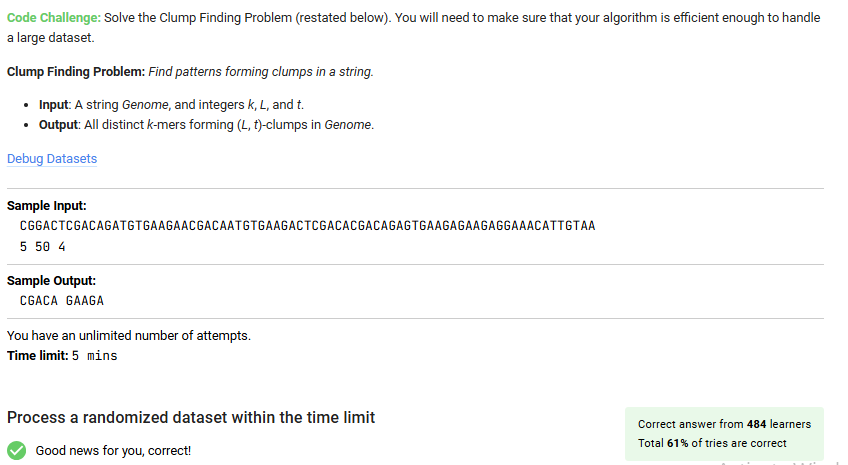

In [31]:
#@title Using the dataset given in the challenge
Text = 'ATTCCGCACGGGAGAGTAAGTGCCCCGCCATATGTGTGGCCGCCGCCGCTTCGGGGGGTAACAGGGGACTAGGTCCCTATTGATCAAGTTGCAATAGGCCGCTTCGGCGCGCCGCTTCGGCGCTTCGGCGACCCTCCACATGCAGGCCATTACCGGTATCCATAAAACATTTATAATGTTGCTAACATTTAACATTTAAACATTTATACGGGTAGCGCTAACAAACATTTATAGAAACATTTATAGAATCGTTCCTTATACCTGTGTGTGAGCCGGATAAGCACAGATTACTTTAGCGTAACTGCGGCGGCGATCTCAATGACAACTTGCGCGGATGTACATCCATGTACATCCATTAGTACATCCATGAGTACATCCATTAGCGTACATCCATGAGCGTACATCCATCCATCTACTAGGTCTCAAGTCTCTGTCTCAAGGTCTCAAGTCCTAGCTAGGCATGTATTTCTCCGTATTATTCGTTAACGAAGGTCTCAAGTCAGTCACTTACAGTCACTTACACTTACGGCGTTAACGAAATAAGTCACTTACCTTAGTCACTTACCGAAACTGTTAGCCTAAGTCACTTACCTACTGGATAGGGAAACCGTAGCGAGCTTGATATGTACTCGTCCCGAGGGGTCCTTACTCCTAAACTGATCCCGCGCACTCCTAAACCCTAAACATATGTCACTCCTAACTCCTAAACCCATCGCCCAAGCACTCCTAAACCTAAACCCACTTGGAGTGTTACTCGATCTGTTGGTTTAGCGGTACTCCCCGGCCACCAATATCAGTCAGCGGCCTTAGGGGAAGCGCCTTAGGGGGCCTTAGGTCGTCCTTATAGGGTGTCGTCCTTACGTGTCGTCCTTATTAAGTCGTCCTTAATCCAAGATGCTAATGGGGACCTAATTGAGAGTTTCTAGTTACTTCGCCTTCGAGCGGTGGAGCAGCAACTCAGCCCGTTTAATGGGCTAGCAGATTACGGTGCACGGACGCCTGGTCCCCTTAGTGAACCGCTCGGTTGTACTGCCACCGCTCTATTACATCCAATCGATGAGGGCTGTAGCCCAAAATCGATGAGCGTTTGATGACGCCAATCGATGAGAATCGATGAGCGAATCGATGAGGCCGTTTGAATCGATGAGATCCGTTTGATGGGGTAAAGTAACCGTGGGTAAAGAAGTAAAGGCGTCTGTTTAATCCTAATGCTAACAACGAAGTACATAACGAACAACGAAGCAACGAAAACAACAACGAAGATGGCCTCATATGGCGAGACCAAAACAACGAAGACTTCGCAAACAACGAAGCGAGCCTATTTCCTATTTGACGAGAGCCTATTTGTGGGGGTTTTGAGCCTATTTCCAGAGCCTATTTTGGTTGAAAAAAAAGGATGTCCTGTATCAATTCTGTCGATCTCCCACCAGCAGTCGCTGCATAGACGATCATCATGGTACATCAGCGCATCCGTCGATACACGGCACGCCAGCTGCGTCGCTTTAACCGGAGTACCAGAGGACCGCTGAAGCAGACAGGTGTCCCACTTCTCCAACTTAGCTTAGGTAGGCTGGTTCCAAGTGCTTTGGCTAACGGGATTCTCATCAAGTGCCGCGTCCTTCGGTAGCTGGGATTAATCAATTTAGACAAATTAACCTCCGAGATCCAGGCAAGGTTCAAAACTTACGTTATAATCTTACGACACTCGGTACACAAAAAGCCCTCGGTTCAACCATACCAAGCGATAAATATGGGTGGGTGTCAGTAGGGACACTCACCATATCTGTACGTACTAGAAACCTTGCCTTTCTACCAATCTTCCAATCTTATTTCTACCAATTACCAATCTTGAATTATACCAATCTTTTCGGTTTTTACCAATCTTGCTACCAATCTTGCCAACTAGTGCTATTCTACCTGAGTCAGAGGAGTGATGTGACCCACATTCTTATCTTGGCGACAGTGTTAAGGTCTTGTTACCACCCGAGAGCACGACTTTT'
k = 10
L = 100
t =4

In [32]:
FindClumps(Text, k,L,t)

{'AAACATTTAT',
 'AACAACGAAG',
 'AACATTTATA',
 'AATCGATGAG',
 'ACTCCTAAAC',
 'AGTCACTTAC',
 'GAGCCTATTT',
 'GTACATCCAT',
 'GTCGTCCTTA',
 'TACCAATCTT'}

# We get an Exercise How many different 9-mers form (500,3)-clumps in the E. coli genome? (In other words, do not count a 9-mer more than once.)
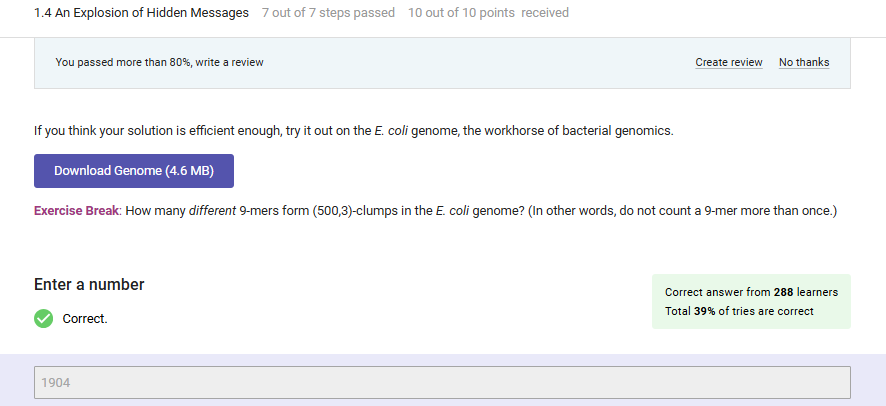

In [33]:
#@title The dataset of the E.coli genome.
import requests

# The dataset of the E.coli genome URL.
txt_url ="https://bioinformaticsalgorithms.com/data/realdatasets/Rearrangements/E_coli.txt"

try:
    response = requests.get(txt_url)
    response.raise_for_status()  # Raise an exception for bad status codes
    Text = response.text
    print(f'Successfully downloaded and read data from URL: {txt_url}')
except requests.exceptions.RequestException as e:
    print(f"Error downloading or reading the file from URL: {e}")
    Text = "" # Assign an empty string or handle the error as needed

Successfully downloaded and read data from URL: https://bioinformaticsalgorithms.com/data/realdatasets/Rearrangements/E_coli.txt


In [35]:
# Applying the function to find the number of clumps of Ecoli genome
len(FindClumpsFaster(Text, 9,500,3))

1904

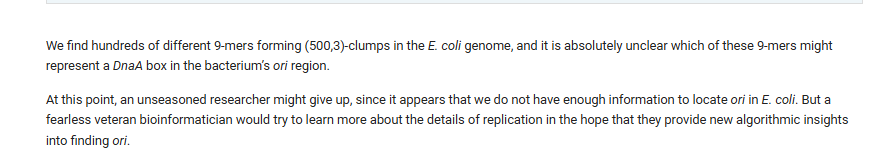